In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(r"C:\Users\kartikeshwar singh\Downloads\archive (11)\sales_data_sample.csv", encoding = 'unicode_escape')


In [29]:
print(data.head())
print(data.info())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

In [30]:
selected_columns = ['SALES', 'QUANTITYORDERED', 'PRICEEACH']
x = data[selected_columns]

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [34]:
inertia = []
for k in range(1, 11):
    k_means = KMeans(n_clusters = k,random_state = 42)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)

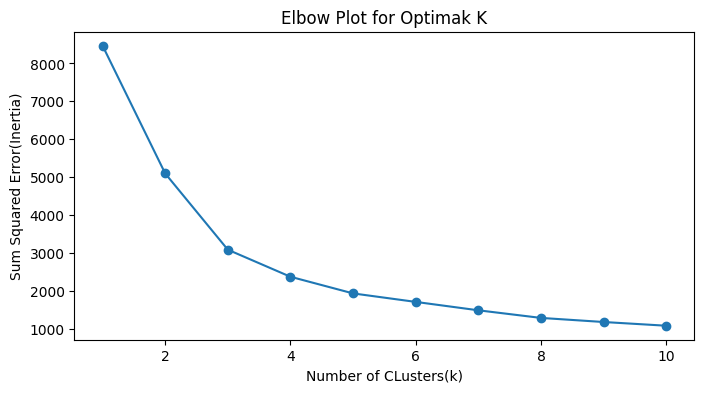

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11),inertia, marker = 'o', linestyle = '-')
plt.title("Elbow Plot for Optimak K")
plt.xlabel("Number of CLusters(k)")
plt.ylabel("Sum Squared Error(Inertia)")
plt.show()

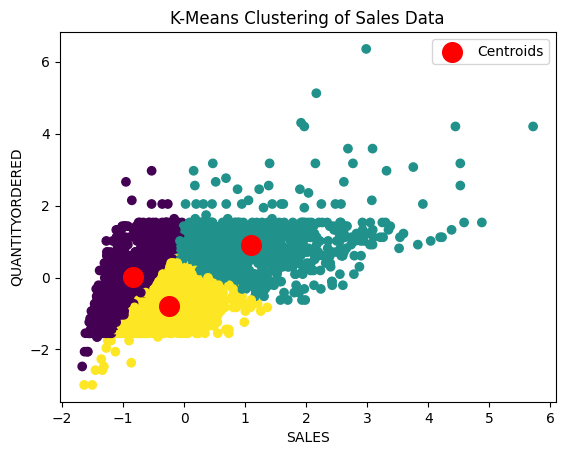

In [39]:
optimal_k = 3
k_means = KMeans(n_clusters = optimal_k, random_state = 42)
y_kmeans = k_means.fit_predict(X_scaled)

data['Clusters'] = y_kmeans

plt.scatter(X_scaled[:, 0],X_scaled[:, 1],c=y_kmeans, cmap='viridis',marker='o')
plt.scatter(k_means.cluster_centers_[:, 0],k_means.cluster_centers_[:, 1], s=200, c='red',label='Centroids')
plt.title("K-Means Clustering of Sales Data")
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.legend()
plt.show()


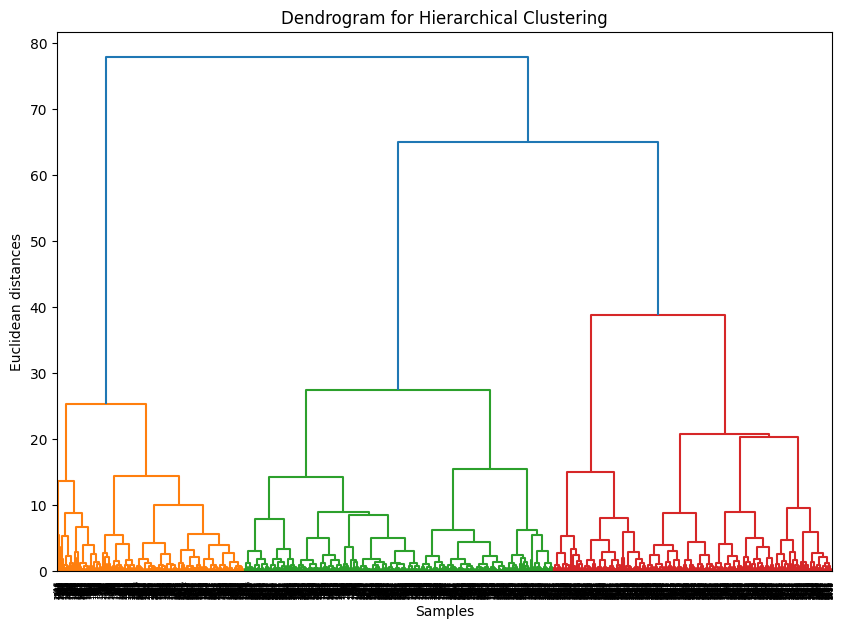

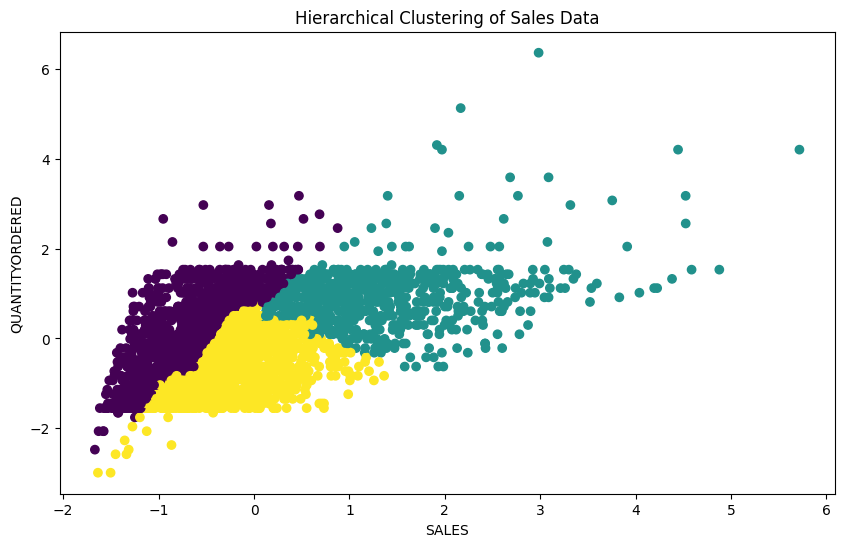

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

# Implement Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
y_agg = agg_cluster.fit_predict(X_scaled)

# Visualization for Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agg, cmap='viridis', marker='o')
plt.title("Hierarchical Clustering of Sales Data")
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.show()
